### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Import Library

In [3]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lala9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Load Data from newdataset**


In [4]:
# 讀取資料
file_path = "./newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(file_path)
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Data Prepration

印出資料有多少筆、以及有多少欄位


In [5]:
print(df.shape)
print(df.columns)

(847, 16)
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


### **Query Data**
use iloc
print out the *text* data for the first three samples in the dataset. 

In [6]:
for i in range(3):
    print(f"Document example {i+1}:")
    print((df.iloc[i]["text"]))


Document example 1:
Calls on retards
Document example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Document example 3:
Seeing lots of red in the ticker.


Data Transformation(資料轉換):
    讓資料可以更加整齊容易觀察和分析，用Pandas轉匯成表格，但現在已經有csv檔案不用轉換成DataFrame

### **** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

印出index為2、3、4的post_id，注意iloc is half-open

In [7]:
df.iloc[2:5]['post_id']

2    mmeevio
3    165kllm
4    mmkl6bw
Name: post_id, dtype: object

In [8]:
df.duplicated('label')

0      False
1      False
2       True
3      False
4       True
       ...  
842     True
843     True
844     True
845     True
846     True
Length: 847, dtype: bool

印出有哪幾種類型的 **type**

In [9]:
print(df['type'].unique())

['comment' 'post']


#### Query data 選擇特定 column 的 data 
選擇 **type** is **comment** 每10筆取一筆，然後在印出前5列

In [10]:
df[df['type']=='comment'].iloc[::10,:].head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.90000,-1.0,[],-1.0
11,comment,2025-04-12 2:51:20,mmo9e6r,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,https://www.reddit.com/r/wallstreetbets/commen...,9,NaN,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.00000,1.0,"['sub', 'WSB', 'Best']",0.0
21,comment,2025-04-06 23:31:33,mls3ha1,stockstobuytoday,If you had $10k in cash…,Either_Breadfruit_90,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,GEO WM,0.000000,0.00000,0.0,"['GEO', 'WM']",0.0
31,comment,2024-08-17 5:32:56,liiwbkk,stockstobuytoday,Best EV / green mining stocks?,[deleted],https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,$EVGO \r\n\r\n*Record Revenue increasing 5 str...,0.422268,0.10788,1.0,"['Jeep', 'program', 'spike', '+', 'Honda', 'Eq...",0.0
41,comment,2021-05-03 22:17:48,gwu560b,stockstobuytoday,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,And plug,0.000000,0.00000,0.0,['plug'],0.0


### Missing value
用 **isnull()** 取缺失的data，如果缺失會回傳Boolean的array回傳True代表缺失的資料

印出那些column有缺失的資料，isnull會以每一column來看

In [11]:
df.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64



因為isnull預設是用 **每一欄** 看有沒有缺失資料，而把axis改成1後可以看 **每一列** 有沒有缺失資料，最後數字顯示這一列缺失多少筆欄位的資料

In [12]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### Duplicate Data

檢查是否有duplicate 用 duplicated()

In [13]:
df.duplicated().sum()

np.int64(0)

因為沒有duplicate data 所以自己新增一筆，用 **concat()**

In [14]:
# Add a row for duplicate testing
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)

In [15]:
df.duplicated().sum()

np.int64(1)

把重複的data清除

In [16]:
print("before drop_dupliacate",df.shape)
df.drop_duplicates(inplace=True)
print("after drop_duplicate",df.shape)

before drop_dupliacate (848, 16)
after drop_duplicate (847, 16)


現在drop的data是看兩個col的val是完全相同才drop


In [17]:
df = df.drop_duplicates(subset=['text', 'label'])

### Data Preprocessing--Sampling

Sample 100筆 Data

In [18]:
X=df.sample(100)
X[:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
573,comment,2021-11-14 14:08:50,hkl7rir,stockstobuytoday,YOLO stocks thread. Reply with your ticker,BrodyFlint,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,I'm doing well with miner stocks. \r\n(AUY) Ya...,0.000000,0.000000,0.0,"['Group', 'AUY', 'Platinum', 'day', 'miner', '...",1.0
749,comment,2025-04-11 15:13:49,mmkqdz5,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,Secret_Cabinet2348,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,This guy is doing the ultimate fake it until y...,1.000000,-0.250000,-1.0,"['everyone', 'fake', 'guy', 'broke']",-1.0
678,comment,2025-04-11 13:12:18,mmk2woo,StockMarket,🚨China responds to Trump’s 145% tariff with an...,Dangerous_Bar6733,https://i.redd.it/2f7y4h6226ue1.jpeg,1,NaN,NaN,"Poor slave, thinking they're free and democrat...",0.400265,-0.014214,-1.0,"['master', 'dissatisfaction', 'Poor', 'slave',...",-1.0
530,comment,2025-04-11 15:50:52,mmky0hh,stocks,The US bond market is continuing to crash. Wil...,futurespacecadet,https://www.reddit.com/r/stocks/comments/1jwsz...,2,NaN,NaN,"moving onto QE, risk on, and then bitcoin pumps",0.000000,0.000000,0.0,"['risk', 'QE']",-1.0
581,comment,2025-04-12 1:45:08,mmnzb98,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,Top-Cup-8198,https://www.reddit.com/r/wallstreetbets/commen...,12,NaN,NaN,Years ago I found Kate Rooney’s instagram.\r\n...,0.518452,-0.080357,-1.0,"['instagram', 'fact', 't', 'auto', 'Small', 's...",1.0


### Visualize

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
X.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

選擇一個column計算每個類別的val，最後繪製長條圖

In [21]:
X['subreddit'].unique()

array(['stockstobuytoday', 'StockMarket', 'stocks', 'wallstreetbets'],
      dtype=object)

In [22]:
print(X['subreddit'].value_counts())

subreddit
stocks              37
stockstobuytoday    22
StockMarket         22
wallstreetbets      19
Name: count, dtype: int64


畫出Sample後subreddit的各個val_counts

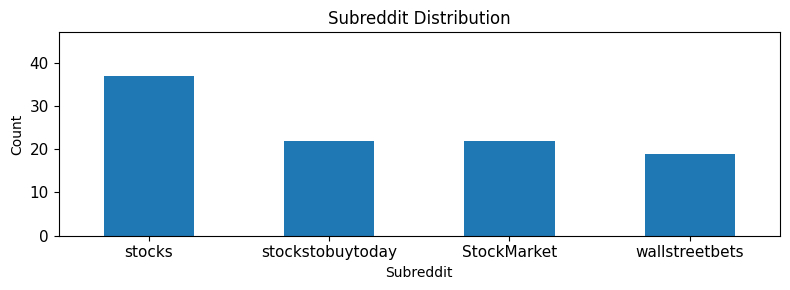

In [23]:
counts = X['subreddit'].value_counts()

counts.plot(
    kind='bar',
    title='Subreddit Distribution',
    ylim=(0, counts.max() + 10),  
    rot=0,
    fontsize=11,
    figsize=(8,3)
)

plt.xlabel("Subreddit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


這邊因為前面指定X and df的subreddit那幾欄位組成dataframe所以呼叫會自動把subreddit當成index，在plot會自動變成x軸類別

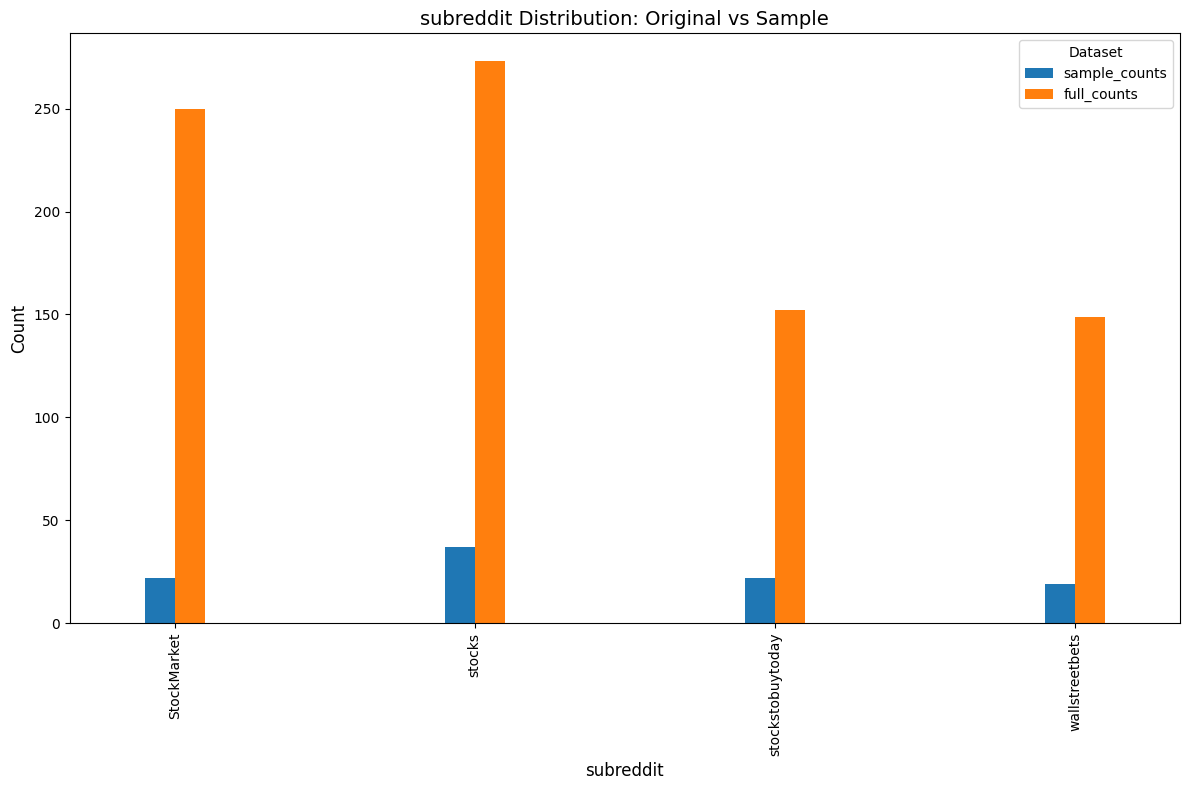

In [24]:
sampel_counts = X['subreddit'].value_counts()
counts = df['subreddit'].value_counts()
df_counts= pd.DataFrame({'sample_counts':sampel_counts, 'full_counts':counts})
ax = df_counts.plot(kind='bar',
                    figsize=(12,8),
                    width=0.2)
plt.title("subreddit Distribution: Original vs Sample", fontsize=14)
plt.xlabel("subreddit", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

### Feature Creation
從現有資料創造出新的資訊欄位，幫助模型更好分析

In [25]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lala9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lala9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

把句子以單詞的方式切出每個部分

In [26]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [27]:
print(X.columns)

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label', 'unigrams'],
      dtype='object')


In [28]:
print(X['unigrams'].head())

573    [I, 'm, doing, well, with, miner, stocks, ., (...
749    [This, guy, is, doing, the, ultimate, fake, it...
678    [Poor, slave, ,, thinking, they, 're, free, an...
530    [moving, onto, QE, ,, risk, on, ,, and, then, ...
581    [Years, ago, I, found, Kate, Rooney, ’, s, ins...
Name: unigrams, dtype: object


列出第一筆的unigrams

In [29]:
list(X[0:1]['unigrams'])

[['I',
  "'m",
  'doing',
  'well',
  'with',
  'miner',
  'stocks',
  '.',
  '(',
  'AUY',
  ')',
  'Yamana',
  'Gold',
  'Co',
  '&',
  '(',
  'PLG',
  ')',
  'Platinum',
  'Group',
  'Metals',
  'as',
  'a',
  'day',
  'trade',
  'stock']]

### Feature Subset Selection
主要要你從前面的文字資料中，建立 Document-Term Matrix (DTM)，並理解這是一種「特徵子集選取」的概念

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#fit_transform() does two things: 會學習有多少單詞，然後建立一個詞矩陣
X_counts = count_vect.fit_transform(X['text']) #learn the vocabulary and return document-term matrix

dtm_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
print(dtm_df)


    08  10  100  10000  11  13  140  15  150  153  ...  yet  yields  yikes  \
0    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
1    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
2    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
3    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
4    0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
..  ..  ..  ...    ...  ..  ..  ...  ..  ...  ...  ...  ...     ...    ...   
95   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
96   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
97   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
98   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
99   0   0    0      0   0   0    0   0    0    0  ...    0       0      1   

    yippee  you  young  your  yours  yourself  zero  
0        

若我今天想要找某個詞是出現在哪篇文章，並且總共出現多少次

方法1:用for loop 慢慢遍歷每個DTM，效能會比較差

In [31]:
num = 0
for i in range(dtm_df.shape[0]):

    word = count_vect.get_feature_names_out()[900]
    if dtm_df.iloc[i][900]>0:
        print(f"Row {i} contains the word '{word}'")
        num+=1
print(f"count of rows that contain the word '{word}': {num}")
    

Row 37 contains the word 'reveal'
count of rows that contain the word 'reveal': 1


C:\Users\lala9\AppData\Local\Temp\ipykernel_29408\2158203469.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dtm_df.iloc[i][900]>0:


方法2:用Mask的方式直接用條件過濾

In [32]:
word = count_vect.get_feature_names_out()[-1]
mask = dtm_df[word] > 0  
print(dtm_df[mask])  

    08  10  100  10000  11  13  140  15  150  153  ...  yet  yields  yikes  \
48   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   
89   0   0    0      0   0   0    0   0    0    0  ...    0       0      0   

    yippee  you  young  your  yours  yourself  zero  
48       0    0      0     0      0         0     1  
89       1    1      0     0      0         0     1  

[2 rows x 1219 columns]


CountVectorizer 是如何將句子切成一個一個的單詞，利用analyzer，最後建立詞矩陣(TDM)

In [33]:
analyze = count_vect.build_analyzer()

In [34]:
analyze(X.iloc[0]['text'])

['doing',
 'well',
 'with',
 'miner',
 'stocks',
 'auy',
 'yamana',
 'gold',
 'co',
 'plg',
 'platinum',
 'group',
 'metals',
 'as',
 'day',
 'trade',
 'stock']

In [35]:
count_vect.get_feature_names_out()[0:10]

array(['08', '10', '100', '10000', '11', '13', '140', '15', '150', '153'],
      dtype=object)

In [37]:
plot_x = ["term_"+ str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [38]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [41]:
X.index

Index([573, 749, 678, 530, 581, 779, 756, 774, 645,  41, 718, 522, 490, 313,
       453, 616, 307, 601, 827, 180, 325, 642, 464, 425, 636, 183,   0, 555,
       578, 676, 316, 343, 443, 570, 605, 348, 269, 351, 404, 724,  85, 821,
       196, 155, 656, 702, 261, 817, 372,  90, 730, 771, 716, 384, 791, 475,
       494, 551,  60, 437, 126, 696, 177,  55,  72, 449,  89, 178, 390, 614,
       416, 543, 140,  96, 102, 701, 300, 324, 467, 526, 466, 674,  95, 483,
       560, 723, 598, 617, 575, 327, 395, 440,  87,  82,  70, 773, 499, 785,
        65, 118],
      dtype='int64')

In [39]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

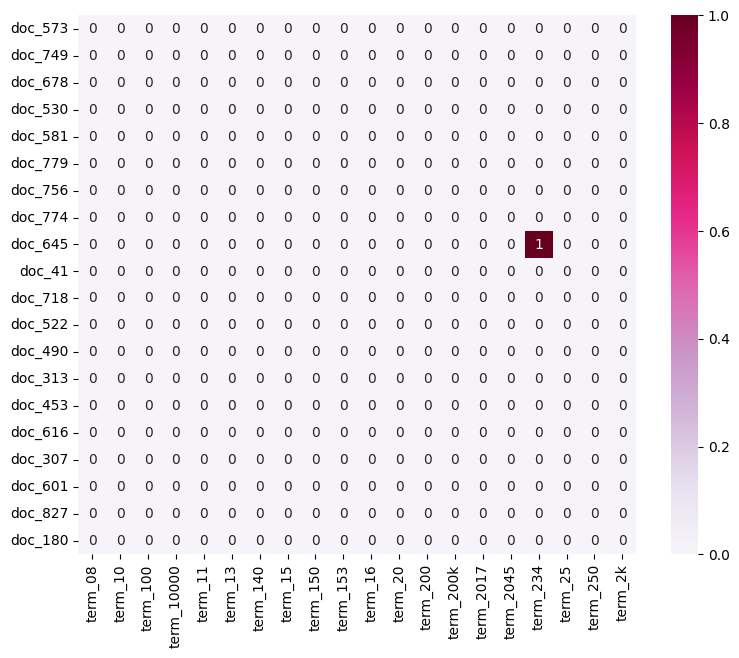

In [40]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

用Heatmap呈現每個詞彙出現在哪篇文章中

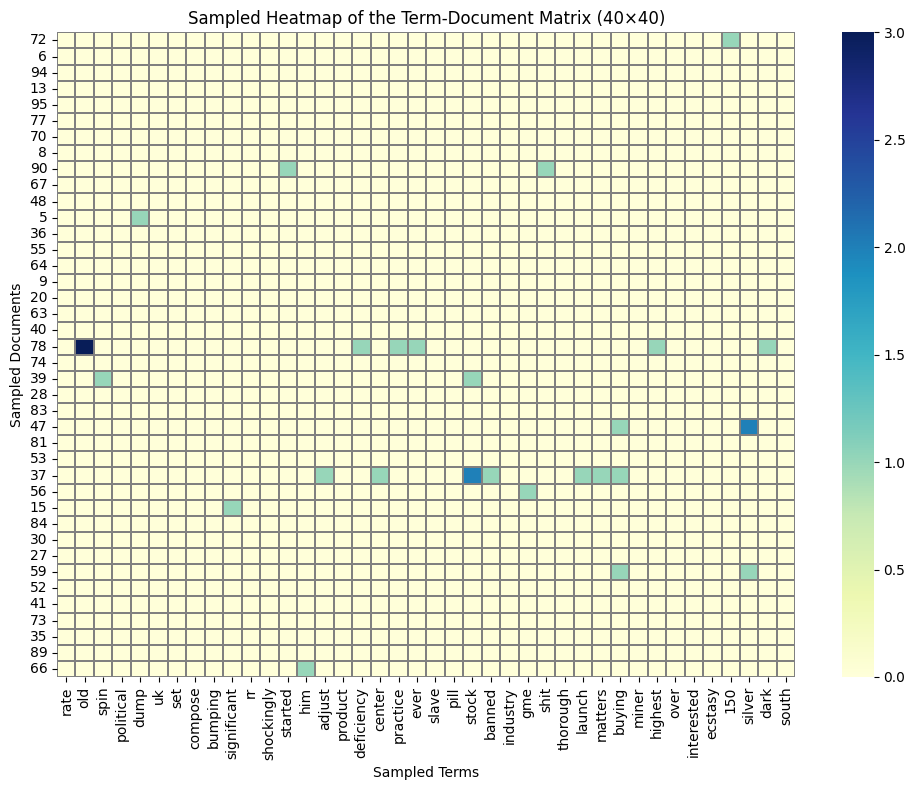

In [45]:
n_docs, n_terms = dtm_df.shape
rng = np.random.default_rng(42)

sample_docs = rng.choice(n_docs, size=min(40, n_docs), replace=False)
sample_terms = rng.choice(n_terms, size=min(40, n_terms), replace=False)
submatrix = dtm_df.iloc[sample_docs, sample_terms]

plt.figure(figsize=(10, 8))
sns.heatmap(submatrix,
            cmap='YlGnBu',
            cbar=True,
            linewidths=0.2,
            linecolor='grey')
plt.title("Sampled Heatmap of the Term-Document Matrix (40×40)")
plt.xlabel("Sampled Terms")
plt.ylabel("Sampled Documents")
plt.tight_layout()
plt.show()

計算每個詞彙出現的總次數

In [53]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies)

[1 3 3 ... 1 2 2]


呈現每個詞彙出現的次數

In [55]:
term_times = pd.DataFrame({'term': count_vect.get_feature_names_out(), 'times': term_frequencies})
term_times = term_times.sort_values(by='times', ascending=False)


#### Visualize--Top N

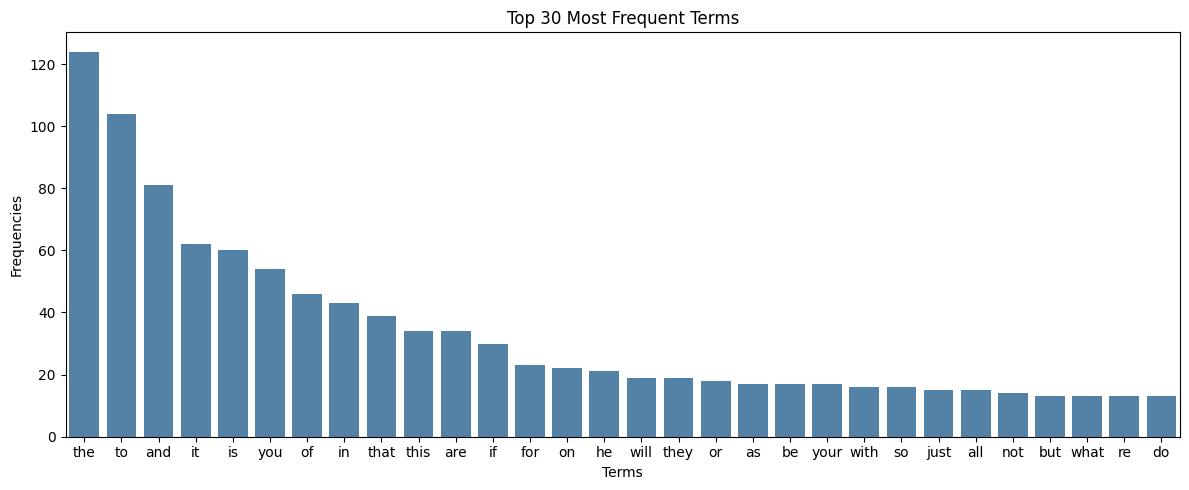

In [57]:
top_n = 30
plt.figure(figsize=(12, 5))
sns.barplot(data=term_times.head(top_n), x='term', y='times',color='steelblue')
plt.title(f'Top {top_n} Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.tight_layout()
plt.show()

#### Visualize - Log
如果前幾個詞太高、其他詞太小，可以對 times 取 log

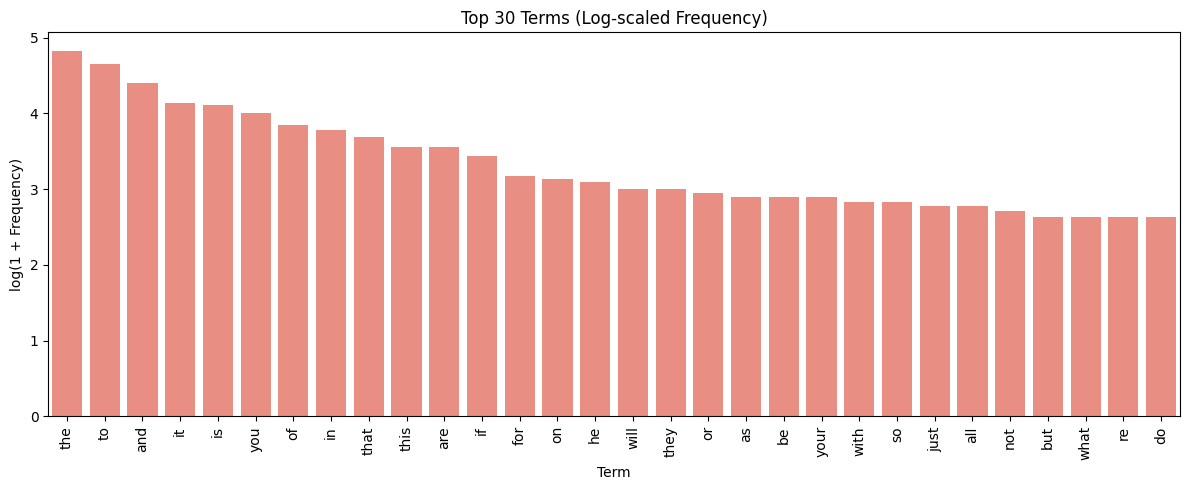

In [58]:
term_times['log_times'] = np.log1p(term_times['times'])

plt.figure(figsize=(12, 5))
sns.barplot(
    data=term_times.head(top_n),
    x='term', y='log_times',
    color='salmon'
)
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Terms (Log-scaled Frequency)")
plt.xlabel("Term")
plt.ylabel("log(1 + Frequency)")
plt.tight_layout()
plt.show()


# Phase 2

In [36]:
### Begin Assignment Here